# Predict profit of a start up company based on investment in RnD

# ML Model - Linear regression
Dataset - 50_StartUps, 
IDE - Jupyter Notebook, 
Language- Python
Libraries - Pandas, Matplotlib, Seaborn

In [1]:
import pandas as pd
A =pd.read_csv("D:/My Work/Data science course/Datasets/50_StartUps.csv")

In [2]:
A.head()

,Unnamed: 0,RND,ADMIN,MKT,STATE,PROFIT
0,0,165349.20,136897.80,471784.10,new york,192261.83
1,1,162597.70,151377.59,443898.53,california,191792.06
2,2,153441.51,101145.55,407934.54,florida,191050.39
3,3,144372.41,118671.85,383199.62,new york,182901.99
4,4,142107.34,91391.77,366168.42,florida,166187.94


# Check for missing data

In [3]:
A.isnull().sum()

Unnamed: 0    0
RND           0
ADMIN         0
MKT           0
STATE         0
PROFIT        0
dtype: int64

# EDA

<AxesSubplot:xlabel='RND', ylabel='PROFIT'>

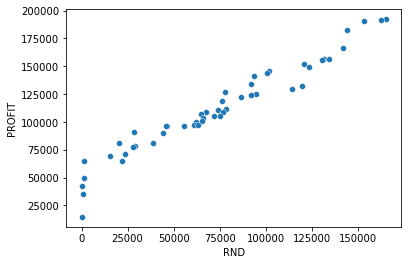

In [4]:
import seaborn as sb
from warnings import filterwarnings
filterwarnings("ignore")
sb.scatterplot(A.RND,A.PROFIT)

<AxesSubplot:xlabel='RND', ylabel='PROFIT'>

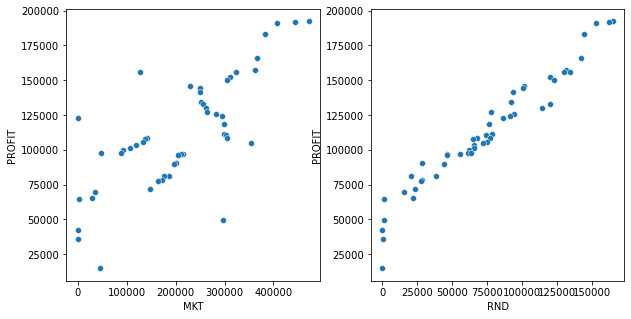

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sb.scatterplot(A.MKT,A.PROFIT)
plt.subplot(1,2,2)
sb.scatterplot(A.RND, A.PROFIT)

In [7]:
A.corr()

,Unnamed: 0,RND,ADMIN,MKT,PROFIT
Unnamed: 0,1.000000,-0.979395,-0.229336,-0.729937,-0.973629
RND,-0.979395,1.000000,0.241955,0.724248,0.972900
ADMIN,-0.229336,0.241955,1.000000,-0.032154,0.200717
MKT,-0.729937,0.724248,-0.032154,1.000000,0.747766
PROFIT,-0.973629,0.972900,0.200717,0.747766,1.000000


# Define input(X) and Output(Y) of Model

In [8]:
x = A[["RND"]]
y = A[["PROFIT"]]

In [9]:
x.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [10]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


# Split the data into training and testing set.


In [11]:
from sklearn.model_selection import train_test_split


In [12]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=10)

In [13]:
xtrain.shape

(40, 1)

In [14]:
xtest.shape

(10, 1)

In [15]:
ytrain.shape

(40, 1)

In [16]:
ytest.shape

(10, 1)

In [17]:
A.describe()

,Unnamed: 0,RND,ADMIN,MKT,PROFIT
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,24.50000,73721.615600,121344.639600,211025.097800,112012.639200
std,14.57738,45902.256482,28017.802755,122290.310726,40306.180338
min,0.00000,0.000000,51283.140000,0.000000,14681.400000
25%,12.25000,39936.370000,103730.875000,129300.132500,90138.902500
50%,24.50000,73051.080000,122699.795000,212716.240000,107978.190000
75%,36.75000,101602.800000,144842.180000,299469.085000,139765.977500
max,49.00000,165349.200000,182645.560000,471784.100000,192261.830000


# Check for Sampling bias
 

<AxesSubplot:ylabel='Density'>

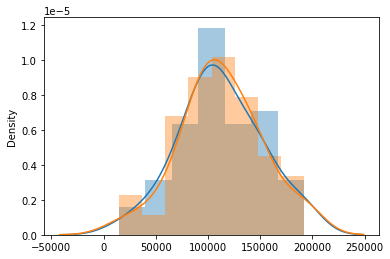

In [18]:
from seaborn import distplot
distplot(y)
distplot(ytrain)

# Create ML model for regression

In [19]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

model = lm.fit(xtrain,ytrain)

from warnings import filterwarnings
filterwarnings("ignore")
# fit function is used for training. 
#This will automatically calculate b0 and b1 values that are stored in the form of an array 

# Find values of b0 and b1

In [20]:
b0 = model.intercept_[0]
b1 = model.coef_[0]

In [21]:
b0

49476.91928712182

In [22]:
b1

array([0.84881531])

In [23]:
b1 = b1[0]

In [24]:
b1

0.8488153104477968

# Create predictions based on test data

In [25]:
B = xtest[['RND']]

In [26]:
B.head()

,RND
37,44069.95
23,67532.53
44,22177.74
42,23640.93
47,0.00


In [27]:
B['b0'] = b0

In [28]:
B.head()

,RND,b0
37,44069.95,49476.919287
23,67532.53,49476.919287
44,22177.74,49476.919287
42,23640.93,49476.919287
47,0.00,49476.919287


In [29]:
B['b1'] = b1

In [30]:
B.head()

,RND,b0,b1
37,44069.95,49476.919287,0.848815
23,67532.53,49476.919287,0.848815
44,22177.74,49476.919287,0.848815
42,23640.93,49476.919287,0.848815
47,0.00,49476.919287,0.848815


In [31]:
B['Predictions'] = b0+b1*B.RND

In [32]:
B.head()

,RND,b0,b1,Predictions
37,44069.95,49476.919287,0.848815,86884.167578
23,67532.53,49476.919287,0.848815,106799.564704
44,22177.74,49476.919287,0.848815,68301.724550
42,23640.93,49476.919287,0.848815,69543.702624
47,0.00,49476.919287,0.848815,49476.919287


In [33]:
B['Actual Profit']=ytest.PROFIT

In [34]:
B.head()

,RND,b0,b1,Predictions,Actual Profit
37,44069.95,49476.919287,0.848815,86884.167578,89949.14
23,67532.53,49476.919287,0.848815,106799.564704,108733.99
44,22177.74,49476.919287,0.848815,68301.724550,65200.33
42,23640.93,49476.919287,0.848815,69543.702624,71498.49
47,0.00,49476.919287,0.848815,49476.919287,42559.73


In [35]:
B['Error']=B["Actual Profit"] - B.Predictions

In [36]:
B.head()

,RND,b0,b1,Predictions,Actual Profit,Error
37,44069.95,49476.919287,0.848815,86884.167578,89949.14,3064.972422
23,67532.53,49476.919287,0.848815,106799.564704,108733.99,1934.425296
44,22177.74,49476.919287,0.848815,68301.724550,65200.33,-3101.394550
42,23640.93,49476.919287,0.848815,69543.702624,71498.49,1954.787376
47,0.00,49476.919287,0.848815,49476.919287,42559.73,-6917.189287


In [37]:
# Find mesn absolute error

B['Absolute_error'] = abs(B.Error)

In [38]:
B.head()

,RND,b0,b1,Predictions,Actual Profit,Error,Absolute_error
37,44069.95,49476.919287,0.848815,86884.167578,89949.14,3064.972422,3064.972422
23,67532.53,49476.919287,0.848815,106799.564704,108733.99,1934.425296,1934.425296
44,22177.74,49476.919287,0.848815,68301.724550,65200.33,-3101.394550,3101.394550
42,23640.93,49476.919287,0.848815,69543.702624,71498.49,1954.787376,1954.787376
47,0.00,49476.919287,0.848815,49476.919287,42559.73,-6917.189287,6917.189287


In [39]:
# Take mean of absolute error
q = B.Absolute_error.mean()
q = round(q,2) # round off number upto 2 decimal points

In [40]:
print("The testing error is ",q)

The testing error is  4622.66


# Plot our Regression

<AxesSubplot:xlabel='RND', ylabel='PROFIT'>

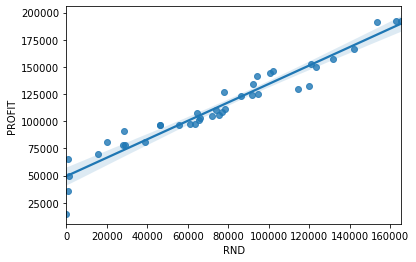

In [41]:
import seaborn as sb
sb.regplot(xtrain,ytrain)

Text(0.5, 1.0, 'RND Vs Profit regression')

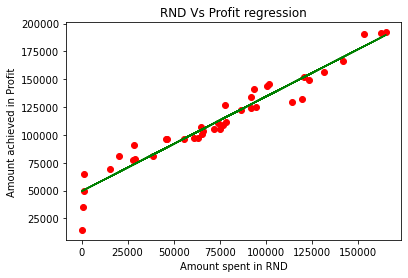

In [42]:
import matplotlib.pyplot as plt
plt.scatter(xtrain.RND,ytrain.PROFIT,c="red")
plt.plot(xtrain.RND,b0+b1*xtrain.RND,c="green")
plt.xlabel("Amount spent in RND")
plt.ylabel("Amount achieved in Profit")
plt.title("RND Vs Profit regression")

# Get predictions for new input

In [43]:
w = int(input("Enter any value of RND: "))
print("Predicted profit is: ", round(b0+b1*w,2),"in INR")

Enter any value of RND: 50000
Predicted profit is:  91917.68 in INR
